In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy.stats import poisson, norm, chisquare

Here we are figuring out our operating voltage.  Notice the count starts to blow up around 950.

Our operating voltage is 780

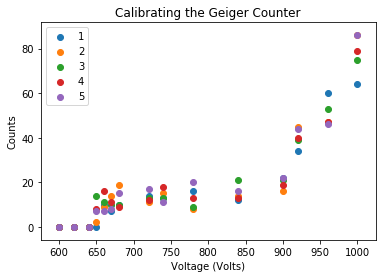

In [2]:
df = pd.read_excel('geiger_calibration.xlsx')
X = df.values
for i in range(1, len(X[0])):
    plt.scatter(X[:, 0], X[:,i])
    
plt.title('Calibrating the Geiger Counter')
plt.ylabel('Counts')
plt.xlabel('Voltage (Volts)')
plt.legend([1,2,3,4,5])
plt.show()

2.254180602006689 2.617666469055156 0.08682779254680381 0.5063676930344727
14.497286269351028 9 18


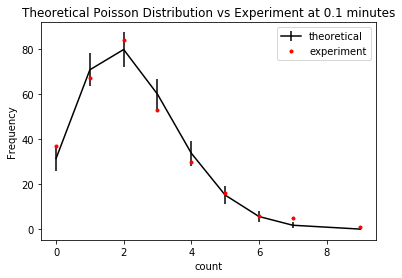

In [7]:
# load data and format for analysis
df1 = pd.read_excel('0.1min_interval_geiger.xlsx')
counts = df1.values
counts = np.ndarray.flatten(counts)
x, y = np.unique(counts, return_counts=True)

# get sample mean, sample variance, bin variance, and chi squared statistic
mean = np.mean(counts)
std = np.std(counts)
mean_uncertainty = np.sqrt(mean/sum(y))
varovar = 1/sum(y)*(mean**4+6*mean**3+7*mean**2-(mean+mean**2)**2*(sum(y)-3)/(sum(y)-1))
uncertainty_of_var = np.sqrt(varovar)
print(mean, std**2, mean_uncertainty, uncertainty_of_var)
yvar = []
for i, exp in enumerate(y):
    yvar.append(sum(y)*poisson.pmf(x[i], mean)*(1-poisson.pmf(x[i], mean)))
    
    
expected_values = sum(y)*poisson.pmf(x, mean)
chi2_arr = []
for i, exp in enumerate(y):
    numer = exp-expected_values[i]
    if exp == 0:
        continue
    denom = np.sqrt(yvar[i])
    chi2_arr.append((numer/denom)**2)
print(sum(chi2_arr), len(x), 2*len(x)) # experimental chi2, theoretical chi2 for poisson, theoretical variance

# plot
plt.errorbar(x, sum(y)*poisson.pmf(x, mean), yerr=np.sqrt(yvar),fmt='-k')
plt.errorbar(x, y, fmt='.r') # binomial std for error bars
plt.title('Theoretical Poisson Distribution vs Experiment at 0.1 minutes')
plt.ylabel('Frequency')
plt.xlabel('count')
plt.legend(['theoretical', 'experiment'])
plt.show()

23.323529411764707 23.395328719723185 0.8282428141369838 46.50118365002407
19.29395996280928 18 36


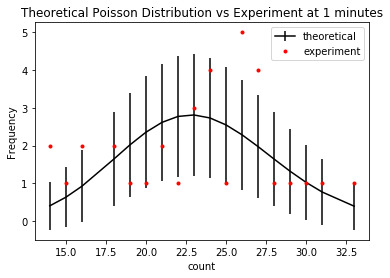

In [6]:
# load data and format for analysis
df1 = pd.read_excel('1min_interval_geiger.xlsx')
counts = df1.values
counts = np.ndarray.flatten(counts)
x, y = np.unique(counts, return_counts=True)

# get sample mean, sample variance, bin variance, and chi squared statistic
mean = np.mean(counts)
std = np.std(counts)
mean_uncertainty = np.sqrt(mean/sum(y))
varovar = 1/sum(y)*(mean**4+6*mean**3+7*mean**2-(mean+mean**2)**2*(sum(y)-3)/(sum(y)-1))
uncertainty_of_var = np.sqrt(varovar)
print(mean, std**2, mean_uncertainty, uncertainty_of_var)
yvar = []
for i, exp in enumerate(y):
    yvar.append(sum(y)*poisson.pmf(x[i], mean)*(1-poisson.pmf(x[i], mean)))
    
    
expected_values = sum(y)*poisson.pmf(x, mean)
chi2_arr = []
for i, exp in enumerate(y):
    numer = exp-expected_values[i]
    if exp == 0:
        continue
    denom = np.sqrt(yvar[i])
    chi2_arr.append((numer/denom)**2)
print(sum(chi2_arr), len(x), 2*len(x)) # experimental chi2, theoretical chi2 for poisson, theoretical variance

# plot
plt.errorbar(x, sum(y)*poisson.pmf(x, mean), yerr=np.sqrt(yvar),fmt='-k')
plt.errorbar(x, y, fmt='.r') # binomial std for error bars
plt.title('Theoretical Poisson Distribution vs Experiment at 1 minutes')
plt.ylabel('Frequency')
plt.xlabel('count')
plt.legend(['theoretical', 'experiment'])
plt.show()

238.8 171.76000000000002 6.910861017268399 18408.744901903556
69.14986041078994 4 8


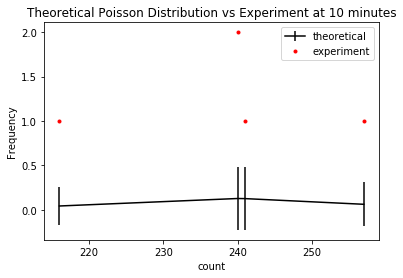

In [8]:
# load data and format for analysis
df1 = pd.read_excel('10min_interval_geiger.xlsx')
counts = df1.values
counts = np.ndarray.flatten(counts)
x, y = np.unique(counts, return_counts=True)

# get sample mean, sample variance, bin variance, and chi squared statistic
mean = np.mean(counts)
std = np.std(counts)
mean_uncertainty = np.sqrt(mean/sum(y))
varovar = 1/sum(y)*(mean**4+6*mean**3+7*mean**2-(mean+mean**2)**2*(sum(y)-3)/(sum(y)-1))
uncertainty_of_var = np.sqrt(varovar)
print(mean, std**2, mean_uncertainty, uncertainty_of_var)
yvar = []
for i, exp in enumerate(y):
    yvar.append(sum(y)*poisson.pmf(x[i], mean)*(1-poisson.pmf(x[i], mean)))
    
    
expected_values = sum(y)*poisson.pmf(x, mean)
chi2_arr = []
for i, exp in enumerate(y):
    numer = exp-expected_values[i]
    if exp == 0:
        continue
    denom = np.sqrt(yvar[i])
    chi2_arr.append((numer/denom)**2)
print(sum(chi2_arr), len(x), 2*len(x)) # experimental chi2, theoretical chi2 for poisson, theoretical variance


# plot
plt.errorbar(x, sum(y)*poisson.pmf(x, mean), yerr=np.sqrt(yvar),fmt='-k')
plt.errorbar(x, y, fmt='.r') # binomial std for error bars
plt.title('Theoretical Poisson Distribution vs Experiment at 10 minutes')
plt.ylabel('Frequency')
plt.xlabel('count')
plt.legend(['theoretical', 'experiment'])
plt.show()